# Market Capitalization Analysis for SOl and ETH

This analysis will look at the market capitalization growth rate for SOL and ETH over time. It will also analyse the market capitalization ratio of SOL to ETH.

In [8]:
-- This SQL code calculates the market capitalization growth rates for Solana (SOL) and Ethereum (ETH) over time.
-- It performs the following steps:

-- 1. Creates a Common Table Expression (CTE) named 'growth_rate' to compute the market cap values and their lagged values.
WITH growth_rate AS (
    SELECT 
        snapped_at,  -- Timestamp of the snapshot
        sol.market_cap AS s1,  -- Current market cap of Solana
        LAG(sol.market_cap) OVER(order by snapped_at) AS s2,  -- Previous market cap of Solana
        eth.market_cap as e1,  -- Current market cap of Ethereum
        LAG(eth.market_cap) OVER(order by snapped_at) AS e2  -- Previous market cap of Ethereum
    FROM 'sol-usd-max.csv' AS sol  -- Solana market cap data
    LEFT JOIN 'eth-usd-max.csv' AS eth  -- Ethereum market cap data
    USING(snapped_at)  -- Join on the 'snapped_at' column
)

-- 2. Selects the snapshot timestamp and calculates the growth rates for Solana and Ethereum.
SELECT 
    snapped_at,  -- Timestamp of the snapshot
    (s1 - s2)/s2 * 100 AS sol_mcap_growth,  -- Growth rate of Solana's market cap
    (e1 - e2)/e2 * 100 AS eth_mcap_growth  -- Growth rate of Ethereum's market cap
FROM growth_rate
WHERE snapped_at >= '2023-11-10'  -- Filters the results to include only snapshots on or after November 10, 2023

,snapped_at,sol_mcap_growth,eth_mcap_growth
0,2023-11-10 00:00:00+00:00,4.472045,12.434151
1,2023-11-11 00:00:00+00:00,25.482739,-2.119786
2,2023-11-12 00:00:00+00:00,-0.370267,-1.343057
3,2023-11-13 00:00:00+00:00,-0.738072,-0.300587
4,2023-11-14 00:00:00+00:00,-6.581521,0.822509
...,...,...,...
176,2024-05-04 00:00:00+00:00,4.328756,4.010896
177,2024-05-05 00:00:00+00:00,1.743766,0.268100
178,2024-05-06 00:00:00+00:00,-0.447334,0.611719
179,2024-05-07 00:00:00+00:00,4.881788,-2.168595


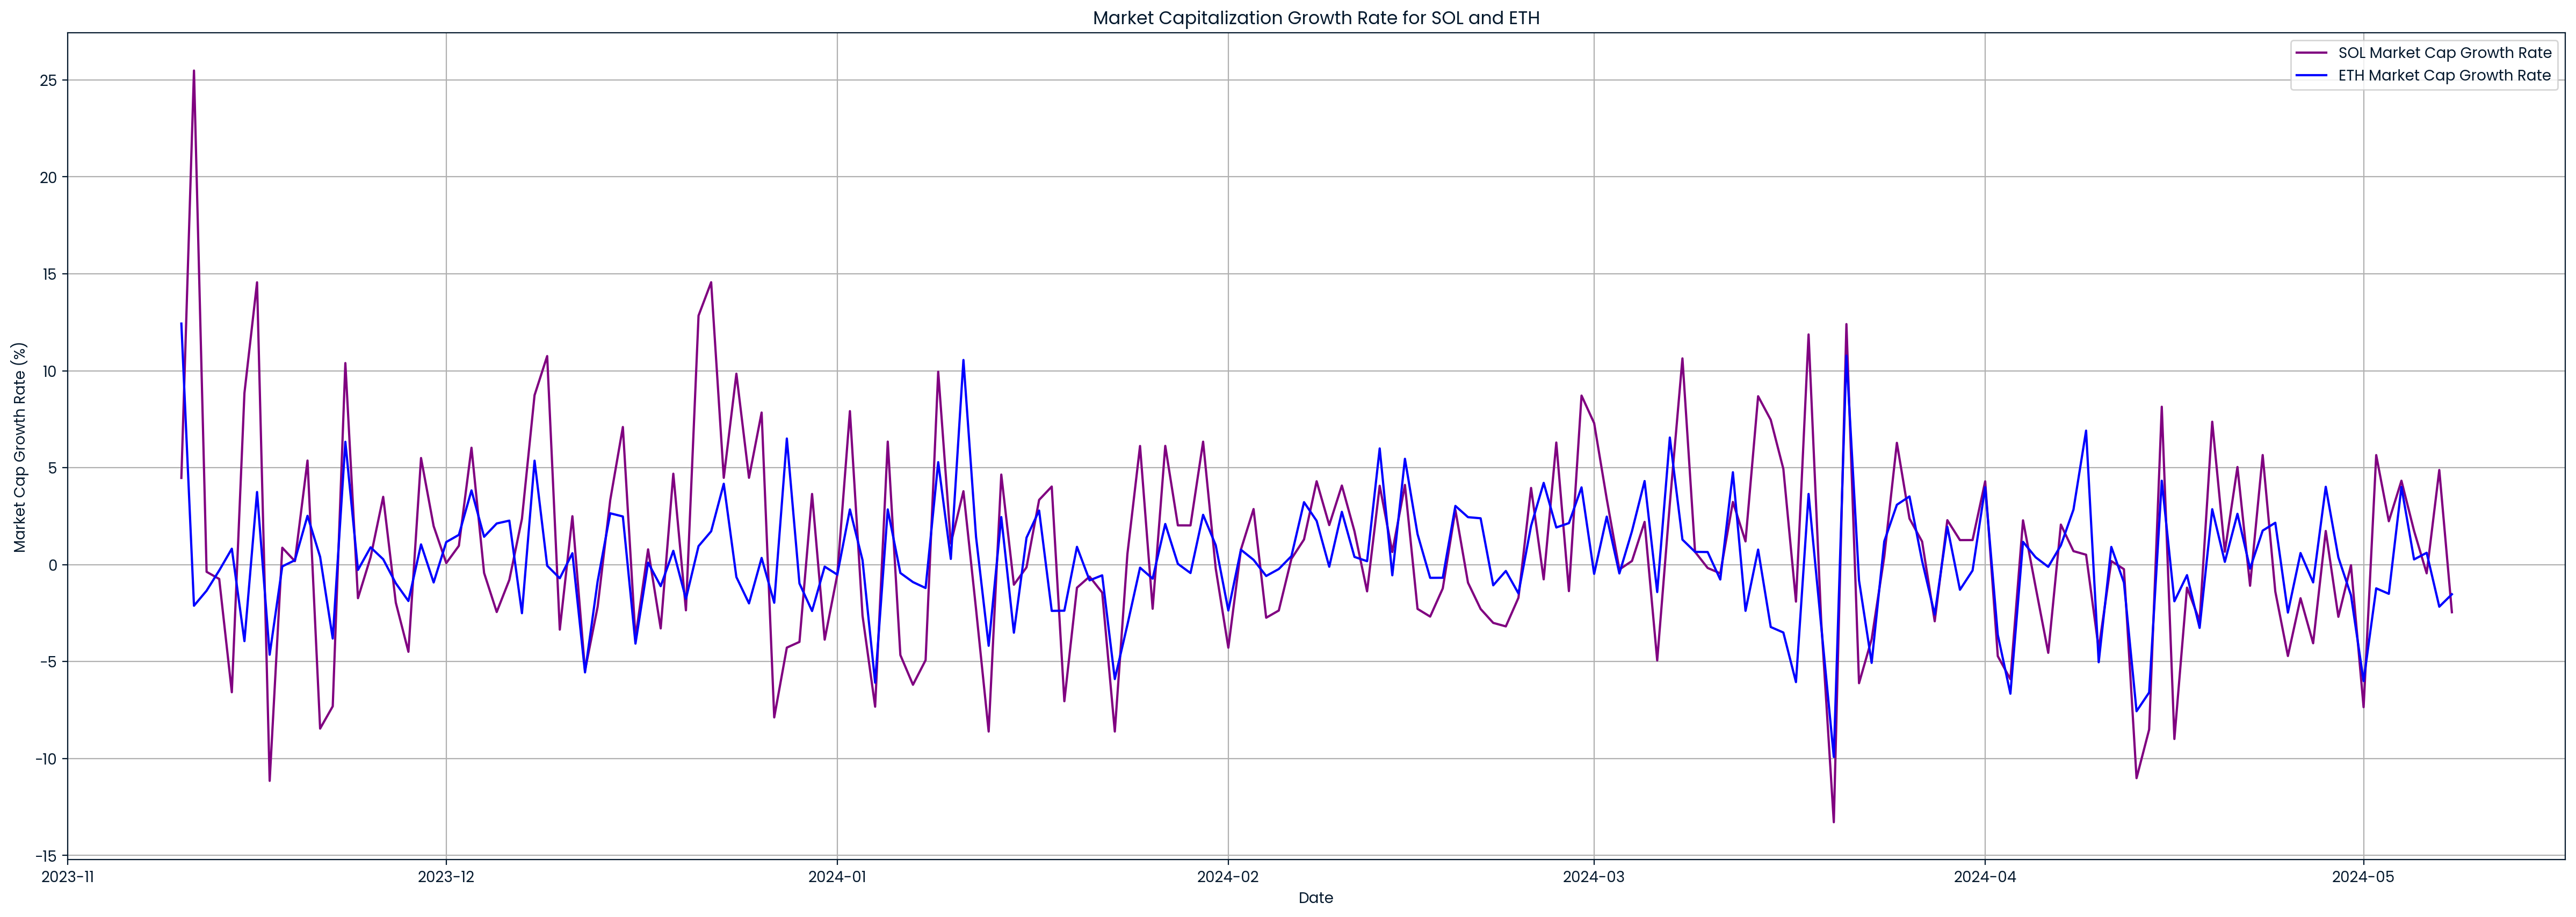

In [19]:
import matplotlib.pyplot as plt

# Plotting the market cap growth rates
plt.figure(figsize=(30, 10))
plt.plot(df['snapped_at'], df['sol_mcap_growth'], label='SOL Market Cap Growth Rate', color='purple')
plt.plot(df['snapped_at'], df['eth_mcap_growth'], label='ETH Market Cap Growth Rate', color='blue')

# Adding titles and labels
plt.title('Market Capitalization Growth Rate for SOL and ETH')
plt.xlabel('Date')
plt.ylabel('Market Cap Growth Rate (%)')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [10]:
SELECT snapped_at, sol.market_cap/eth.market_cap AS mcap_ratio
FROM 'sol-usd-max.csv' AS sol
LEFT JOIN 'eth-usd-max.csv' AS eth
USING(snapped_at)
WHERE snapped_at BETWEEN '2023-05-10' AND '2024-05-10'

,snapped_at,mcap_ratio
0,2023-05-10 00:00:00+00:00,0.036738
1,2023-05-11 00:00:00+00:00,0.037393
2,2023-05-13 00:00:00+00:00,0.038016
3,2023-05-14 00:00:00+00:00,0.038410
4,2023-05-16 00:00:00+00:00,0.038061
...,...,...
360,2023-08-02 00:00:00+00:00,0.042769
361,2023-08-05 00:00:00+00:00,0.042089
362,2024-01-08 00:00:00+00:00,0.144056
363,2024-05-03 00:00:00+00:00,0.171802


In [11]:
SELECT snapped_at, sol.market_cap/eth.market_cap AS mcap_ratio
FROM 'sol-usd-max.csv' AS sol
LEFT JOIN 'eth-usd-max.csv' AS eth
USING(snapped_at)

,snapped_at,mcap_ratio
0,2020-04-11 00:00:00+00:00,0.000451
1,2020-04-13 00:00:00+00:00,0.000409
2,2020-04-14 00:00:00+00:00,0.000364
3,2020-04-15 00:00:00+00:00,0.000302
4,2020-04-17 00:00:00+00:00,0.000290
...,...,...
1484,2023-08-05 00:00:00+00:00,0.042089
1485,2023-09-20 00:00:00+00:00,0.041719
1486,2023-12-25 00:00:00+00:00,0.176610
1487,2021-09-03 00:00:00+00:00,0.083919


In [12]:
SELECT MIN(mcap_ratio) AS lowest_mcap_ratio, MAX(mcap_ratio) AS highest_mcap_ratio, (MAX(mcap_ratio) - MIN(mcap_ratio))/MIN(mcap_ratio) * 100 AS mcap_ratio_perc_change
FROM df2

,lowest_mcap_ratio,highest_mcap_ratio,mcap_ratio_perc_change
0,0.000195,0.207394,106174.530676
